In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pp
import pandas as pd

In [2]:
import bq_helper
from bq_helper import BigQueryHelper

nyc = bq_helper.BigQueryHelper(active_project="nyc-open-data",
                               dataset_name="new_york")

query = """SELECT
  start_station_latitude,
  start_station_longitude,
  end_station_latitude,
  end_station_longitude
FROM
  `bigquery-public-data.new_york.citibike_trips`
LIMIT 2000000;
"""

df = nyc.query_to_pandas_safe(query, max_gb_scanned=10)

In [3]:
len(df)

2000000

In [4]:
lat_mid = -73.975111
lon_mid = 40.744396

In [5]:
linlat = []
linlon = []

for idx in range(0, 100000):
    linlat.extend(np.linspace(df['start_station_latitude'][idx], df['end_station_latitude'][idx], num=70))
    linlon.extend(np.linspace(df['start_station_longitude'][idx], df['end_station_longitude'][idx], num=70))

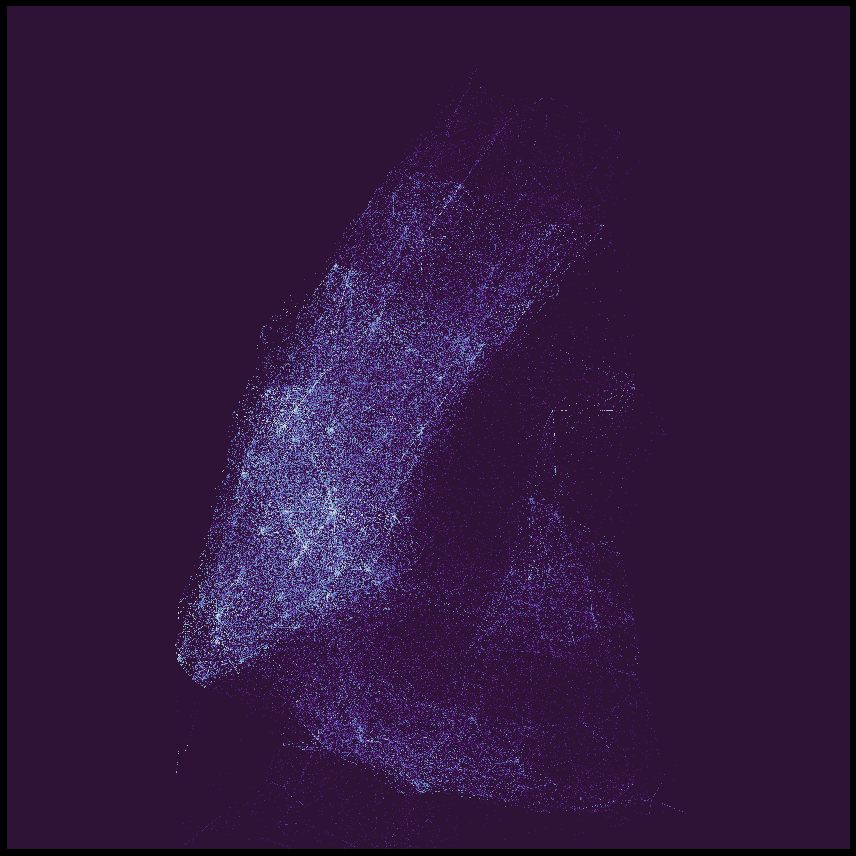

In [8]:
nrbins = 3000
spread = 0.07
hist = np.zeros((nrbins,nrbins))

# Compute the histogram with the longitude and latitude data as a source
hist, _, _  = np.histogram2d(x=linlat, y=linlon, bins=nrbins, 
                                          range = [[lon_mid - spread, lon_mid + spread], [lat_mid - spread, lat_mid + spread]])

# We consider the counts on a logarithmic scale
img = np.log(hist[::-1,:] + 1)

# Plot the counts
pp.figure(figsize=(12,12), facecolor='black')
pp.imshow(img, 'twilight_shifted')
pp.axis('off')
pp.tight_layout()
pp.savefig('citibike.png', dpi=199)